In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('test.csv',encoding="SHIFT-JIS")

In [6]:
kensei =  df[(df.試合ID==1000)&(df.イニング==1)&(df.表裏F==1)&(df.牽制先の塁!=0)]

In [76]:
game_list = np.arange(1000,1482,1)
inning_list = np.arange(1,12,1)
side_list = [0,1]
X = []
Y = []
for i in game_list :
    for j in inning_list:
        for k in side_list:
            data1= df[(df.試合ID==i)&(df.イニング==j)&(df.表裏F==k)&(df.一球結果ID==1)]
            data2 = df[(df.試合ID==i)&(df.イニング==j)&(df.表裏F==k)&(df.当該打者投球数!=0)]
            if len(data2)>0:
                counts = max(data2.イニング内打席数C)
                X.append(len(data1.点数)/counts)
                data3 = df[(df.試合ID==i)&(df.イニング==j)&(df.表裏F==k)&(df.点数!=0)]
                Y.append(sum(data3.点数.values))

[[-0.0713093]]
0.001643143456846352


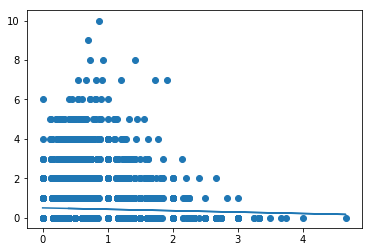

In [66]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
X_ = np.array(X).reshape(-1,1)
Y_ = np.array(Y).reshape(-1,1)
clf.fit(X_, Y_)
print(clf.coef_)
p = clf.predict(X_)

plt.scatter(X_,Y_)
plt.plot(X_,p)

print(clf.score(X_,Y_))

In [74]:
kensei_int = [int(x) for x in kensei ]
score_max = max(score)
kensei_max = max(kensei_int)
kensei_matrix = np.zeros([score_max+1,kensei_max+1],dtype = 'int32')
for i,j in zip(kensei_int,score):
    kensei_matrix[j,i] +=1
df_kensei = pd.DataFrame(kensei_matrix)
df_kensei

,0,1,2,3,4
0,4135,2016,262,24,2
1,866,313,27,1,0
2,385,140,7,0,0
3,178,54,1,0,0
4,92,18,0,0,0
5,39,8,0,0,0
6,11,1,0,0,0
7,4,3,0,0,0
8,2,1,0,0,0
9,1,0,0,0,0


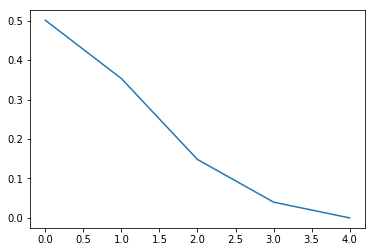

In [75]:
kensei_matrix_norm = np.zeros([len(kensei_matrix),len(kensei_matrix.T)])
for i in range(len(kensei_matrix.T)):
    kensei_matrix_norm[:,i] = kensei_matrix[:,i]/np.sum(kensei_matrix[:,i])
df_kensei_norm = pd.DataFrame(kensei_matrix_norm)
df_kensei_norm

score_rate = []
for i in range(len(kensei_matrix_norm.T)):
    score_temp = 0
    for j in range(len(kensei_matrix_norm)):
        score_temp+=kensei_matrix_norm[j,i]*j
    score_rate.append(score_temp)
foul_list = np.arange(len(kensei_matrix_norm.T))
plt.plot(foul_list,score_rate)